#### Importing Required Library

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


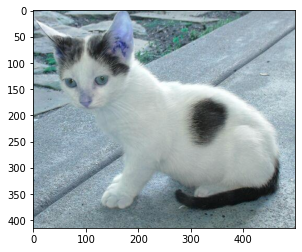

In [11]:
# Checking the image of cat.
cat3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/train/CAT/3.jpg')
Cat3 = cv2.cvtColor(cat3,cv2.COLOR_BGR2RGB)
plt.imshow(cat3);

In [12]:
# shape of cat image
cat3.shape

(415, 500, 3)

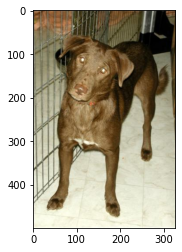

In [13]:
# Lets upload the another image of dog.
dog1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/train/DOG/1.jpg')
dog1 = cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)
plt.imshow(dog1);


In [14]:
dog1.shape

(500, 327, 3)

Here the size of the image is completely different. All this images are of different sizes, which is reflective of real world data.

#### Preprocessing Data:


In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
image_gen = ImageDataGenerator( rotation_range=30,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode = 'nearest'
                                )

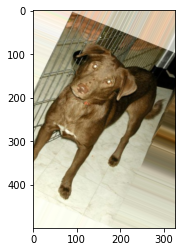

In [17]:
# Passing one image throught the image data generator.
plt.imshow(image_gen.random_transform(dog1));

In [19]:
# Generate many manupulated images directly from the directory.
image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train')

Found 18773 images belonging to 2 classes.


In [20]:
input_shape = (150,150,3)

#### Building a Model

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import unique, argmax 

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
                    

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

#### Training a Model

In [27]:
# Training Set
batch_size= 40
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train',
                                                 target_size=input_shape[:2],
                                                 batch_size=batch_size,
                                                 class_mode='binary')


Found 18773 images belonging to 2 classes.


In [28]:

# Test Set
test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/test',
                                                 target_size=input_shape[:2],
                                                 batch_size=batch_size,
                                                 class_mode='binary')

Found 6261 images belonging to 2 classes.


In [29]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [30]:
result = model.fit_generator(train_image_gen, epochs=20, steps_per_epoch=200,
                              validation_data = test_image_gen,
                              validation_steps=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
116/200 [================>.............] - ETA: 8:08 - loss: 0.6929 - accuracy: 0.5071

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 1135s 6s/step - loss: 0.6931 - accuracy: 0.5126 - val_loss: 0.6916 - val_accuracy: 0.6214
Epoch 2/20
200/200 [==============================] - 753s 4s/step - loss: 0.6929 - accuracy: 0.5093 - val_loss: 0.6943 - val_accuracy: 0.4881
Epoch 3/20
200/200 [==============================] - 526s 3s/step - loss: 0.6916 - accuracy: 0.5246 - val_loss: 0.6877 - val_accuracy: 0.4881
Epoch 4/20
200/200 [==============================] - 449s 2s/step - loss: 0.6724 - accuracy: 0.5831 - val_loss: 0.6403 - val_accuracy: 0.6548
Epoch 5/20
200/200 [==============================] - 397s 2s/step - loss: 0.6516 - accuracy: 0.6258 - val_loss: 0.6222 - val_accuracy: 0.6738
Epoch 6/20
200/200 [==============================] - 385s 2s/step - loss: 0.6375 - accuracy: 0.6450 - val_loss: 0.6233 - val_accuracy: 0.6452
Epoch 7/20
200/200 [==============================] - 357s 2s/step - loss: 0.6214 - accuracy: 0.6631 - val_loss: 0.5882 - val_accuracy: 0.6762
Epoch 8/2

#### Evaluating Model

In [31]:
result.history['accuracy']

[0.5126110911369324,
 0.5092856884002686,
 0.524648904800415,
 0.583142876625061,
 0.6258240342140198,
 0.645027220249176,
 0.6631428599357605,
 0.6887142658233643,
 0.7010604739189148,
 0.7297219634056091,
 0.741428554058075,
 0.7552857398986816,
 0.7598571181297302,
 0.771142840385437,
 0.7732856869697571,
 0.7774285674095154,
 0.7980796694755554,
 0.7940670847892761,
 0.7929999828338623,
 0.7977142930030823]

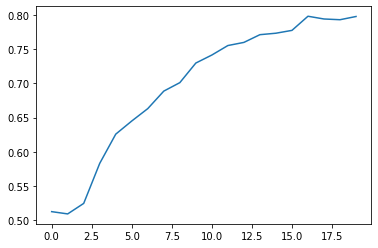

In [32]:
# Visualizing the performance
plt.plot(result.history['accuracy'])

In [33]:
# Saving Model
model.save('cat_dog_CNN.h5')

#### Predection on New Image:

In [54]:
dog_file = '/content/drive/MyDrive/Colab Notebooks/test/DOG/9377.jpg'

In [55]:
from keras.preprocessing import image
dog_img = image.load_img(dog_file,target_size=(150,150))
dog_img = image.img_to_array(dog_img)

In [56]:
dog_img.shape

(150, 150, 3)

In [57]:
# We expand the dimension of image to make batch of one. 
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)


In [58]:
dog_img.shape

(1, 150, 150, 3)

In [59]:
dog_img = dog_img/255

In [62]:
model.predict(dog_img)


array([[0.57259417]], dtype=float32)